In [58]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [59]:
from __future__ import absolute_import , division , print_function , unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries 
import numpy as np 
import matplotlib.pyplot as plt

In [60]:
print(tf.__version__)

2.4.0


In [61]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

In [62]:
type(cifar10_data)

tuple

In [63]:
len(cifar10_data)

2

In [124]:
(train_images, train_labels), (test_images, test_labels) = cifar10_data

In [125]:
print(train_images[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [66]:
print(train_images[0].shape)

(32, 32, 3)


In [67]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [68]:
### Exercise 8 - Explore the data

In [69]:
len(train_images)

50000

In [70]:
train_images[0].shape

(32, 32, 3)

In [71]:
### Exercise 9 - Preprocess the data

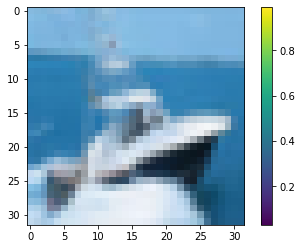

'ship'

In [110]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

class_names[train_labels[index][0]]

In [26]:
### Exercise 10

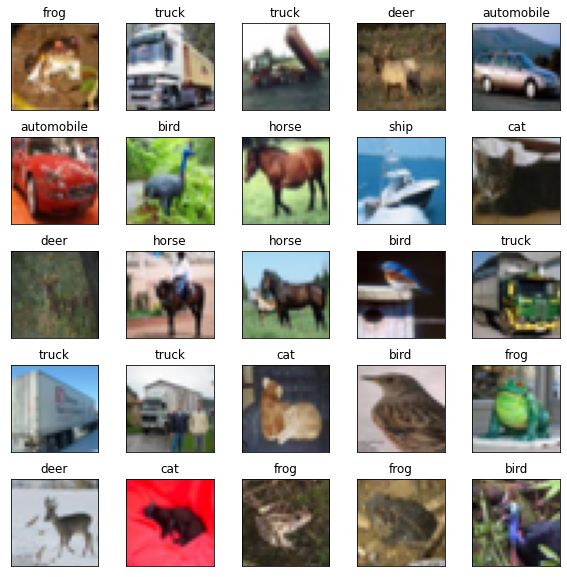

In [73]:
fig,axes = plt.subplots(5,5, gridspec_kw={'hspace': 0.3}, figsize=(10,10))
for index in range(25):
  axes[index//5,index%5].set_xticks([])
  axes[index//5,index%5].set_yticks([])
  axes[index//5,index%5].imshow(train_images[index])
  axes[index//5,index%5].grid(False)
  axes[index//5,index%5].set_title(class_names[train_labels[index][0]])
plt.show()



In [82]:
# Exercise 11

In [126]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [127]:
# Exercise 12

In [128]:
model = keras.Sequential ([
                           keras.layers.Flatten(input_shape=(32,32,3)),
                           keras.layers.Dense(128,activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
])

In [129]:
# Exercise 13 (just some lesson)

In [130]:
# Exercise 14

In [131]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [132]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0347 - accuracy: 0.2809
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7438 - accuracy: 0.3781
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6830 - accuracy: 0.4067
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6498 - accuracy: 0.4114
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6210 - accuracy: 0.4261
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6005 - accuracy: 0.4344
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5887 - accuracy: 0.4343
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5737 - accuracy: 0.4381
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5680 - accuracy: 0.4442
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.552

In [133]:
# Exercise 15

In [134]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 1.5614 - accuracy: 0.4489


In [135]:
# Exercise 16

In [136]:
predictions = model.predict(test_images)

In [160]:
print(predictions[0])

[0.0118125  0.02526185 0.02775746 0.28898472 0.01093336 0.24008936
 0.3112519  0.00512377 0.06990087 0.00888418]


Image :  1
Predicted label : frog
Espected label : cat


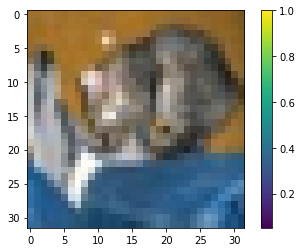


Image :  2
Predicted label : automobile
Espected label : ship


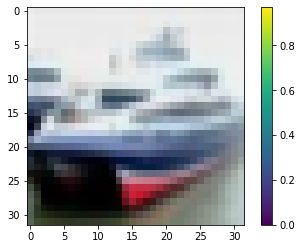


Image :  3
Predicted label : ship
Espected label : ship


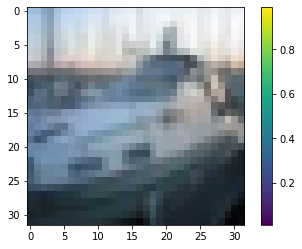

In [143]:
for i in range(0,3):
  print('Image : ', i+1)
  print('Predicted label : %s' %(class_names[np.argmax(predictions[i])]))
  print('Espected label : %s' %(class_names[test_labels[i][0]]))
  plt.figure()
  plt.imshow(test_images[i])
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print()

In [141]:
# Exercise 17

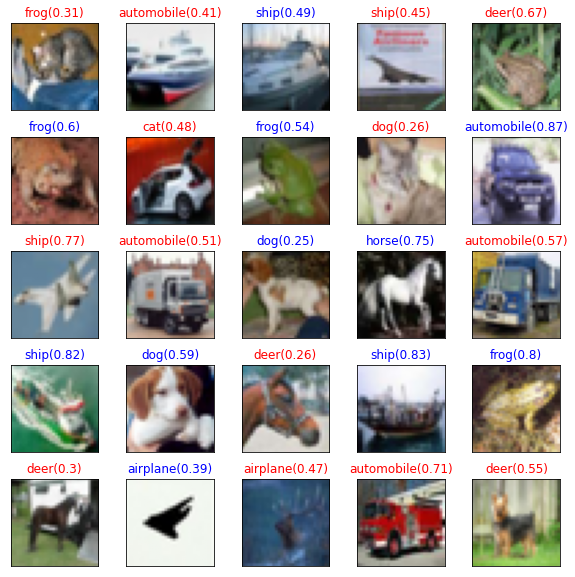

In [165]:
fig,axes = plt.subplots(5,5, gridspec_kw={'hspace': 0.3}, figsize=(10,10))
for index in range(25):
  name = class_names[np.argmax(predictions[index])] + '(' + str(round(predictions[index][np.argmax(predictions[index])], 2)) + ')'
  col = 'red'
  if np.argmax(predictions[index]) == test_labels[index][0]:
    col = 'blue'
  axes[index//5,index%5].set_xticks([])
  axes[index//5,index%5].set_yticks([])
  axes[index//5,index%5].imshow(test_images[index])
  axes[index//5,index%5].grid(False)
  axes[index//5,index%5].set_title(name, fontdict={'color': col})
plt.show()

In [158]:
# Exercise 18

In [166]:
test_images[5]

array([[[0.70196078, 0.4627451 , 0.3254902 ],
        [0.54509804, 0.37647059, 0.23921569],
        [0.30196078, 0.19215686, 0.10196078],
        ...,
        [0.34117647, 0.20784314, 0.18039216],
        [0.29803922, 0.18431373, 0.16078431],
        [0.30196078, 0.18431373, 0.16078431]],

       [[0.72156863, 0.50980392, 0.38039216],
        [0.52156863, 0.34509804, 0.20784314],
        [0.50196078, 0.34901961, 0.22745098],
        ...,
        [0.38431373, 0.23921569, 0.20784314],
        [0.35686275, 0.22745098, 0.2       ],
        [0.35294118, 0.22352941, 0.19215686]],

       [[0.70588235, 0.51764706, 0.39215686],
        [0.59607843, 0.40784314, 0.27843137],
        [0.69019608, 0.50588235, 0.36078431],
        ...,
        [0.39607843, 0.24313725, 0.20784314],
        [0.36470588, 0.21960784, 0.18431373],
        [0.37254902, 0.22352941, 0.19215686]],

       ...,

       [[0.55686275, 0.28627451, 0.23921569],
        [0.58431373, 0.32941176, 0.29411765],
        [0.56470588, 0

In [167]:
#predict_test = model.predict(test_images[5])

ValueError: ignored

In [171]:
predict_test2 = model.predict(np.expand_dims(test_images[5], axis = 0))

In [172]:
predict_test2

array([[0.01271331, 0.00725159, 0.04307139, 0.1842339 , 0.01742321,
        0.11234118, 0.59587556, 0.01824531, 0.000612  , 0.00823248]],
      dtype=float32)

In [173]:
#Exercise 19

In [174]:
model2 = keras.Sequential ([
                           keras.layers.Flatten(input_shape=(32,32,3)),
                           keras.layers.Dense(128,activation='relu'),
                           keras.layers.Dense(10,activation='softmax')
])

In [177]:
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [178]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0047 - accuracy: 0.2792
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7489 - accuracy: 0.3833
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6587 - accuracy: 0.4155
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6046 - accuracy: 0.4359
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5676 - accuracy: 0.4480
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5243 - accuracy: 0.4659
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5053 - accuracy: 0.4672
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4762 - accuracy: 0.4812
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4542 - accuracy: 0.4866
Epoch 10/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.433

In [179]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 1.4756 - accuracy: 0.4749


In [ ]:
# list of optimizer : sgd, rmsprop, adam, adadelta, adagrad, adamax, nadam, ftrl
# https://keras.io/api/optimizers/
# list of loss : https://keras.io/api/losses/